# Helpful Python Code for Making Figures

Author: Megan Thompson-Munson

Date created: 5 February 2022

## Libraries

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.mathtext import _mathtext as mathtext
import matplotlib_inline.backend_inline
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

## Plotting Aesthetics Applied to All Figures

In [2]:
# Figure aesthetics set for all figures in the script

# Figure rendering format
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Font style and sizes
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 10
mpl.rcParams['figure.titlesize'] = 12
mpl.rcParams['figure.titleweight'] = 'bold' 
mpl.rcParams['axes.titlesize'] = 10
mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.default'] = 'regular'
mathtext.FontConstantsBase.sup1 = 0.4

# Line style
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['lines.linestyle'] = '-'

## Colors

Many of the color palettes below can be found on [this site](https://personal.sron.nl/~pault/).

### Discrete

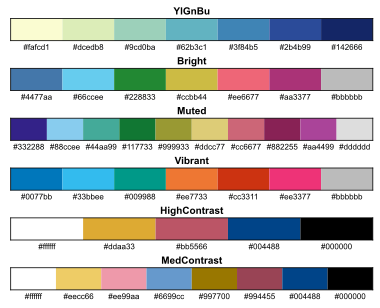

In [3]:
# Colorblind-friendly color palettes
YlGnBu = ['#fafcd1','#dcedb8','#9cd0ba','#62b3c1','#3f84b5','#2b4b99','#142666']
Bright = ['#4477aa','#66ccee','#228833','#ccbb44','#ee6677','#aa3377','#bbbbbb']
Muted = ['#332288','#88ccee','#44aa99','#117733','#999933','#ddcc77','#cc6677','#882255','#aa4499','#dddddd']
Vibrant = ['#0077bb','#33bbee','#009988','#ee7733','#cc3311','#ee3377','#bbbbbb']
HighContrast = ['#ffffff','#ddaa33','#bb5566','#004488','#000000']
MedContrast = ['#ffffff','#eecc66','#ee99aa','#6699cc','#997700','#994455','#004488','#000000']

colorList = [YlGnBu,Bright,Muted,Vibrant,HighContrast,MedContrast]
colorListStr = ['YlGnBu','Bright','Muted','Vibrant','HighContrast','MedContrast']

# Plot colors for visualization
fig, ax = plt.subplots(len(colorList),figsize=(6.5,5))
for i in range(len(colorList)):
    
    cList = colorList[i]

    x0 = np.linspace(0,10,len(cList),endpoint=False)
    x1 = np.linspace(0,10,len(cList)+1,endpoint=True)
    xmid = (x1[1:]+x1[:-1])/2
    
    ax[i].axes.yaxis.set_ticks([])
    ax[i].axes.xaxis.set_ticks([])
    ax[i].set_ylim((0,1))
    ax[i].set_xlim((0,10))
    ax[i].set_title(colorListStr[i],pad=4)
    ax[i].tick_params(axis='x',length=0)
    ax[i].set_xticks(xmid)
    ax[i].set_xticklabels([c for c in cList],fontsize=8)
    
    for j in range(len(cList)):
        ax[i].bar(x0[j],1,color=cList[j],align='edge',width=x0[1])


plt.subplots_adjust(hspace=1.25)

## Examples of Common Figure Features

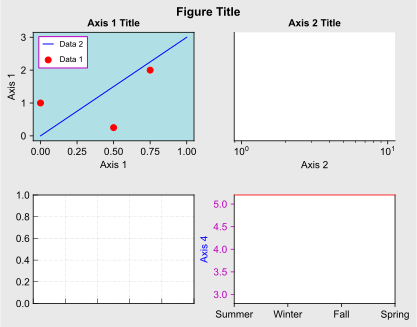

In [4]:
# Set up figure and axes
fig, ax = plt.subplots(2,2,figsize=(6.5,5))

# Figure settings
fig.patch.set_facecolor('#e9e9e9')
fig.suptitle('Figure Title',y=0.95)

# Axis 1 settings
ax[0,0].patch.set_facecolor('powderblue')
ax[0,0].set_title('Axis 1 Title')
ax[0,0].set_xlabel('Axis 1')
ax[0,0].set_ylabel('Axis 1')
ax[0,0].scatter([0,0.5,0.75],[1,0.25,2],c='r',label='Data 1')
ax[0,0].plot([0,1],[0,3],c='b',label='Data 2')
legend = ax[0,0].legend(prop={'size':8},borderpad=0.25,labelspacing=1.0,handlelength=1.25,framealpha=1,
                        loc='upper left',bbox_to_anchor=(0.025,0.975))
frame = legend.get_frame()
frame.set_edgecolor('m')
frame.set_boxstyle('Square')

# Axis 2 settings
# ax[0,1].patch.set_facecolor('w')
ax[0,1].set_title('Axis 2 Title')
ax[0,1].set_xlabel('Axis 2')
ax[0,1].axes.yaxis.set_ticks([])
ax[0,1].spines['right'].set_visible(False)
ax[0,1].spines['top'].set_visible(False)
ax[0,1].set_xscale('log')

# Axis 3 settings
ax[1,0].tick_params(direction='in',length=5,width=0.5)
ax[1,0].axes.xaxis.set_ticklabels([])
ax[1,0].grid(lw=0.5,c='#dddddd',ls='-.')

# Axis 4 settings
ax[1,1].set_ylabel('Axis 4',c='b')
ax[1,1].set_ylim((2.8,5.2))
ax[1,1].tick_params(axis='y',colors='m')
ax[1,1].set_xticks([0,1,2,3])
ax[1,1].set_xticklabels(['Summer','Winter','Fall','Spring'])
ax[1,1].spines['top'].set_color('r')

# Adjust subplot spacing
plt.subplots_adjust(wspace=0.25,hspace=0.5)

# # Save as .png or .pdf
# plt.savefig('testfig.png',dpi=300,bbox_inches='tight')
# plt.savefig('testfig.pdf',bbox_inches='tight')

## Figure Templates

### Basic Figure

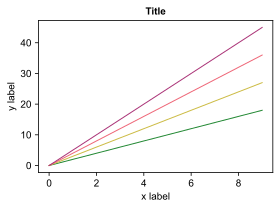

In [5]:
# Example data for plotting
x = range(0,10)
y0 = [i*2 for i in x]
y1 = [i*3 for i in x]
y2 = [i*4 for i in x]
y3 = [i*5 for i in x]

# Set up figure and axes
fig, ax = plt.subplots(1,figsize=(4,3))

# Make background white (mostly for saving the figure)
fig.patch.set_facecolor('w')

# Title and labels
ax.set_title('Title')
ax.set_xlabel('x label')
ax.set_ylabel('y label')

# Plot the data
ax.plot(x,y0,c=Bright[2])
ax.plot(x,y1,c=Bright[3])
ax.plot(x,y2,c=Bright[4])
ax.plot(x,y3,c=Bright[5])

# Show figure with tight layout (reduces white space)
plt.tight_layout()

# # Save as .png or .pdf
# plt.savefig('testfig.png',dpi=300,bbox_inches='tight')
# plt.savefig('testfig.pdf',bbox_inches='tight')

### Density Profile

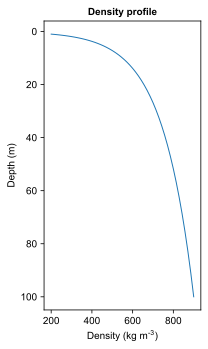

In [6]:
# Example data for plotting
d = np.logspace(0,2)
rho = np.linspace(200,900,len(d))

# Set up figure and axes
fig, ax = plt.subplots(1,figsize=(3,5))

# Make background white (mostly for saving the figure)
fig.patch.set_facecolor('w')

# Title and labels
ax.set_title('Density profile')
ax.set_xlabel(r'Density (kg m$^{-3}$)')
ax.set_ylabel('Depth (m)')

# Axis limits and directions
ax.invert_yaxis()

# Plot the data
ax.plot(rho,d)

# Show figure with tight layout (reduces white space)
plt.tight_layout()

# # Save as .png or .pdf
# plt.savefig('testfig.png',dpi=300,bbox_inches='tight')
# plt.savefig('testfig.pdf',bbox_inches='tight')

## Example: Map

In [ ]:
# Only show points where SUMup FAC is greater than 0
condition = dfSmetFAC.SU_FAC>0

# Set up figure
fig = plt.figure(figsize=(6.5,4))
fig.patch.set_facecolor('#FFFFFF')

# Plot SUMup FAC
ax1 = plt.subplot(1,3,1,projection=ccrs.NorthPolarStereo(central_longitude=-45))
ax1.set_extent([-56.5, -30, 58, 85], ccrs.PlateCarree())
ax1.coastlines(resolution='50m',color='#808080')
ax1.set_title('(a) Observations',fontsize=10)
suplot = ax1.scatter(dfSmetFAC.SU_Longitude[condition], dfSmetFAC.SU_Latitude[condition],
            transform=ccrs.PlateCarree(),
            c=dfSmetFAC.SU_FAC[condition],cmap='viridis',vmin=0,vmax=20,
            s=25,edgecolor='k',lw=0.5)

# Plot SNOWPACK FAC
ax2 = plt.subplot(1,3,2,projection=ccrs.NorthPolarStereo(central_longitude=-45))
ax2.set_extent([-56.5, -30, 58, 85], ccrs.PlateCarree())
ax2.coastlines(resolution='50m',color='#808080')
ax2.set_title('(b) SNOWPACK',fontsize=10)
spplot = ax2.scatter(dfSmetFAC.M2_Longitude_x[condition], dfSmetFAC.M2_Latitude_x[condition],
            transform=ccrs.PlateCarree(),
            c=dfSmetFAC.SP_FAC[condition],cmap='viridis',vmin=0,vmax=20,
            s=25,edgecolor='k',lw=0.5)

# Plot CFM FAC
ax3 = plt.subplot(1,3,3,projection=ccrs.NorthPolarStereo(central_longitude=-45))
ax3.set_extent([-56.5, -30, 58, 85], ccrs.PlateCarree())
ax3.coastlines(resolution='50m',color='#808080')
ax3.set_title('(c) CFM',fontsize=10)
cfmplot = ax3.scatter(dfSmetFAC.M2_Longitude_x[condition], dfSmetFAC.M2_Latitude_x[condition],
            transform=ccrs.PlateCarree(),
            c=dfSmetFAC.CFM_FAC[condition],cmap='viridis',vmin=0,vmax=20,
            s=25,edgecolor='k',lw=0.5)

# Color bar
cax = fig.add_axes([ax3.get_position().x1+0.1,ax3.get_position().y0,0.02,ax3.get_position().height])
cbar = plt.colorbar(cfmplot,cax=cax,ticks=[0,5,10,15,20])
cbar.ax.set_yticklabels(['0','5','10','15','20+'])
cbar.set_label('FAC (m)',rotation=270,labelpad=7.5)

plt.tight_layout()

# plt.savefig('/content/drive/Shareddrives/IDS_shared/IDS/combine_results/firn_paper_figures/figure-3_FAC-map.png',dpi=500,bbox_inches='tight')